In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('home_price-1.csv')
df.head()

,per_capita_crime_rate,proportion_large_lots,proportion_non_retail_business,by_river,nitric_oxide_concentration,avg_no_of_rooms_per_home,proportion_old_homes,avg_distance_from_downtown,highway_access_index,property_tax_per_10k,pupil_teacher_ratio,percentage_lower_status_population,median_value_of_home(1000s_dollars)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df['median_value_of_home(1000s_dollars)'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: median_value_of_home(1000s_dollars), dtype: float64

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train and test
X = df.drop(['median_value_of_home(1000s_dollars)'], axis=1)
y = df['median_value_of_home(1000s_dollars)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize relationship with correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                                     per_capita_crime_rate  \
per_capita_crime_rate                             1.000000   
proportion_large_lots                            -0.200469   
proportion_non_retail_business                    0.406583   
by_river                                         -0.055892   
nitric_oxide_concentration                        0.420972   
avg_no_of_rooms_per_home                         -0.219247   
proportion_old_homes                              0.352734   
avg_distance_from_downtown                       -0.379670   
highway_access_index                              0.625505   
property_tax_per_10k                              0.582764   
pupil_teacher_ratio                               0.289946   
percentage_lower_status_population                0.455621   
median_value_of_home(1000s_dollars)              -0.388305   

                                     proportion_large_lots  \
per_capita_crime_rate                            -0.200469   
proport

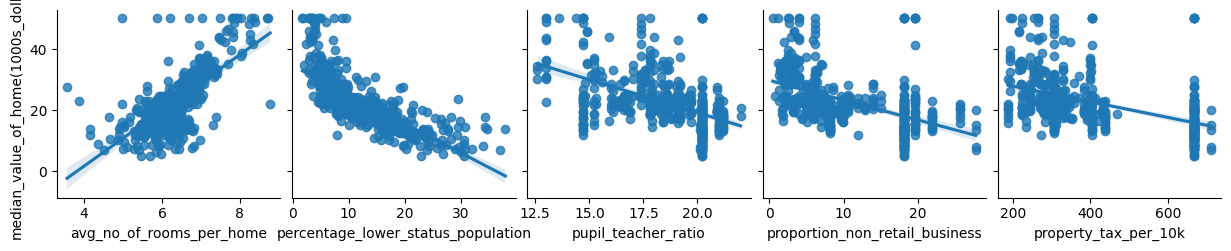

In [ ]:
# Visualize relationship with scatterplot
sns.pairplot(df, x_vars=['avg_no_of_rooms_per_home', 'percentage_lower_status_population', 'pupil_teacher_ratio', 'proportion_non_retail_business', 'property_tax_per_10k'], y_vars=['median_value_of_home(1000s_dollars)'], kind='reg')
plt.show()

Based on the correlation matrix and the linear relationship of the the features, I selected the following 5 features because they had the strongest postive or negative relationship with the target variable:

*   'avg_no_of_rooms_per_home'
*   'percentage_lower_status_population'
*   'pupil_teacher_ratio'
*   'proportion_non_retail_business'
*   'property_tax_per_10k'

In [ ]:
# Select the top 5 most relevant features and create a new dataset with only these features
selected_features = ['avg_no_of_rooms_per_home', 'percentage_lower_status_population', 'pupil_teacher_ratio', 'proportion_non_retail_business', 'property_tax_per_10k']

In [ ]:
# Split the new dataset into train and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
reg = LinearRegression()
reg.fit(X_train_selected, y_train)

# Evaluate performance using Mean Squared Error (MSE) and R-squared score
y_train_pred = reg.predict(X_train_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.3f}")
print(f"Train R-squared: {train_r2:.3f}")

y_test_pred = reg.predict(X_test_selected)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.3f}")
print(f"Test R-squared: {test_r2:.3f}")


Train MSE: 27.498
Train R-squared: 0.687
Test MSE: 26.086
Test R-squared: 0.650


MSE: The test MSE shows that the model's average error in predicting the median home value is approximately 26,000 dollars which is a relatively small error compared to the range of the target variable (5,000 to 50,000 dollars).

R-squared: The test R-squared score shows that the model explains about 65% of the variance in the target variable. The range of the target variable is large so capturing 65% of the variance is still meaningful.

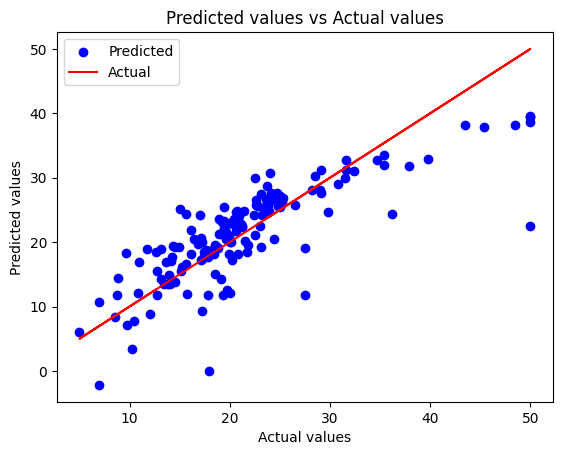

In [ ]:
# Plot the predicted values vs the actual values for the test dataset
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted values vs Actual values")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

# Evaluate performance on test set
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Evaluate performance on test set
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [ ]:
# Compare performance on test set
print("Linear Regression:")
print("Test MSE:", test_mse)
print("Test R-squared:", test_r2)

print("Ridge Regression:")
print("Test MSE:", ridge_mse)
print("Test R-squared:", ridge_r2)

print("Lasso Regression:")
print("Test MSE:", lasso_mse)
print("Test R-squared:", lasso_r2)

Linear Regression:
Test MSE: 26.086021704045045
Test R-squared: 0.6499135956539919
Ridge Regression:
Test MSE: 21.739786928599713
Test R-squared: 0.7082420645267788
Lasso Regression:
Test MSE: 25.390561162448613
Test R-squared: 0.6592469958609797


The Ridge Regression model had the best performance relative to the other models with the lowest MSE and highest R-squared.

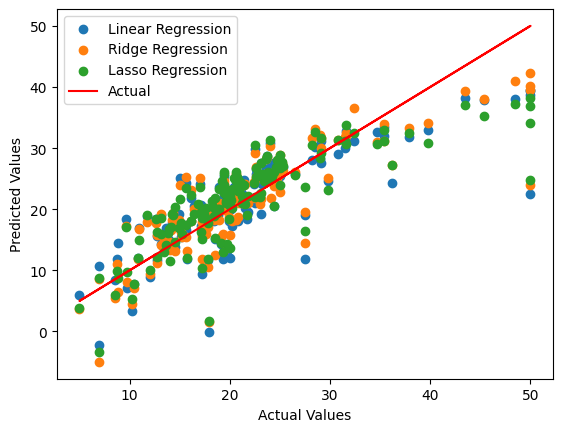

In [ ]:
# Plot predicted vs actual values
plt.scatter(y_test, y_test_pred, label="Linear Regression")
plt.scatter(y_test, ridge_pred, label="Ridge Regression")
plt.scatter(y_test, lasso_pred, label="Lasso Regression")
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
alphas = np.logspace(-4, 1, 100)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': alphas}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_best_alpha = ridge_grid.best_params_['alpha']

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': alphas}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso_best_alpha = lasso_grid.best_params_['alpha']

In [ ]:
print(ridge_best_alpha)
print(lasso_best_alpha)

0.0001
0.0001


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression with best alpha
ridge_best = Ridge(alpha=ridge_best_alpha)
ridge_best.fit(X_train, y_train)
ridge_best_pred = ridge_best.predict(X_test)
ridge_best_mse = mean_squared_error(y_test, ridge_best_pred)
ridge_best_r2 = r2_score(y_test, ridge_best_pred)

# Lasso Regression with best alpha
lasso_best = Lasso(alpha=lasso_best_alpha)
lasso_best.fit(X_train, y_train)
lasso_best_pred = lasso_best.predict(X_test)
lasso_best_mse = mean_squared_error(y_test, lasso_best_pred)
lasso_best_r2 = r2_score(y_test, lasso_best_pred)

In [ ]:
print("Linear Regression:")
print("Test MSE:", test_mse)
print("Test R-squared:", test_r2)

print("Ridge Regression:")
print("Test MSE:", ridge_best_mse)
print("Test R-squared:", ridge_best_r2)

print("Lasso Regression:")
print("Test MSE:", lasso_best_mse)
print("Test R-squared:", lasso_best_r2)

Linear Regression:
Test MSE: 26.086021704045045
Test R-squared: 0.6499135956539919
Ridge Regression:
Test MSE: 21.115535518271482
Test R-squared: 0.7166198054536694
Lasso Regression:
Test MSE: 21.117043938279767
Test R-squared: 0.7165995617636605


Comparing the results before and after applying grid search to find the best alpha, the performance of both Ridge and Lasso improved even more. However, the Ridge Regression still outperforms both the Linear Regression and Lasso Regression. The Lasso Regression also did not get rid of any features.